In [1]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('datasets/website_classification.csv')
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [3]:
df.shape

(1408, 4)

In [4]:
df['Category'].unique()

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

In [5]:
df.groupby(['Category']).size()

Category
Adult                               16
Business/Corporate                 109
Computers and Technology            93
E-Commerce                         102
Education                          114
Food                                92
Forums                              16
Games                               98
Health and Fitness                  96
Law and Government                  84
News                                96
Photography                         93
Social Networking and Messaging     83
Sports                             104
Streaming Services                 105
Travel                             107
dtype: int64

<AxesSubplot:xlabel='Category'>

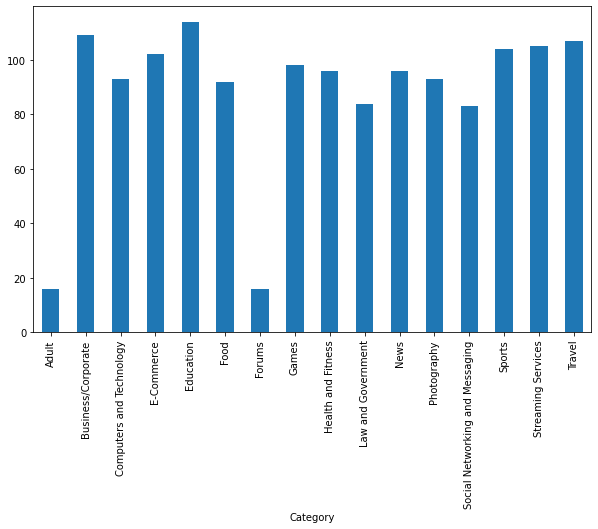

In [6]:
df.groupby(['Category']).size().plot(kind='bar',figsize=(10, 6))

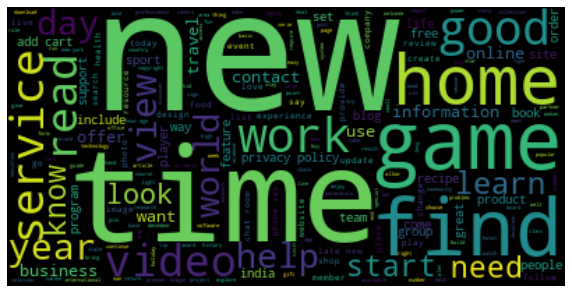

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.cleaned_website_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = df['cleaned_website_text']
Y = df['Category']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
x_train_vet = vectorizer.fit_transform(x_train)
x_test_vet = vectorizer.transform(x_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(x_train_vet, y_train)

In [11]:
y_pred = dt_model.predict(x_test_vet)

In [12]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [13]:
pred_results.head()

,y_test,y_pred
543,News,News
860,Games,Business/Corporate
669,Law and Government,Law and Government
710,Health and Fitness,Education
690,Health and Fitness,Health and Fitness


In [14]:
df_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
df_crosstab

y_test,Adult,Business/Corporate,Computers and Technology,E-Commerce,Education,Food,Forums,Games,Health and Fitness,Law and Government,News,Photography,Social Networking and Messaging,Sports,Streaming Services,Travel
y_pred,,,,,,,,,,,,,,,,
Adult,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Business/Corporate,0,6,0,1,1,1,1,1,1,3,1,0,0,1,1,1
Computers and Technology,0,2,10,0,0,0,1,2,0,0,0,0,0,0,0,2
E-Commerce,2,1,0,13,0,1,1,1,1,0,0,0,0,1,0,0
Education,0,2,2,0,5,0,1,0,3,2,0,0,1,0,0,0
Food,0,0,1,2,0,16,0,0,2,1,0,0,0,1,0,0
Forums,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Games,1,0,0,1,2,0,0,16,1,0,0,0,0,3,0,2
Health and Fitness,0,2,1,0,1,0,0,0,14,0,1,0,0,0,0,1


In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred, average='macro')

print("Acurácia : ", accuracy)
print("Precisão Macro: ", precision)
print("Recall : ", recall)

Acurácia :  0.624113475177305
Precisão Macro:  0.612747112019705
Recall :  0.5719423670678045


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(x_train_vet, y_train)

In [17]:
y_pred = rf_model.predict(x_test_vet)

In [18]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [19]:
pred_results.head()

,y_test,y_pred
543,News,News
860,Games,Computers and Technology
669,Law and Government,Business/Corporate
710,Health and Fitness,Streaming Services
690,Health and Fitness,Health and Fitness


In [20]:
df_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
df_crosstab

y_test,Adult,Business/Corporate,Computers and Technology,E-Commerce,Education,Food,Forums,Games,Health and Fitness,Law and Government,News,Photography,Social Networking and Messaging,Sports,Streaming Services,Travel
y_pred,,,,,,,,,,,,,,,,
Business/Corporate,0,16,3,1,0,0,1,1,2,1,1,1,0,0,0,0
Computers and Technology,0,0,10,0,1,0,1,1,0,0,1,0,0,0,0,0
E-Commerce,2,0,0,18,0,0,0,2,0,0,1,0,0,0,0,0
Education,0,0,2,0,11,0,0,0,0,0,0,0,0,0,0,0
Food,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0
Games,0,0,0,1,0,0,0,19,0,0,0,0,1,2,0,0
Health and Fitness,0,0,0,0,0,0,0,0,20,0,1,0,0,0,0,0
Law and Government,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0
News,2,0,0,0,0,0,1,0,0,0,13,1,0,1,0,1


In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
recall = recall_score(y_test, y_pred, average='macro')

print("Acurácia : ", accuracy)
print("Precisão Macro: ", precision)
print("Recall : ", recall)

Acurácia :  0.8120567375886525
Precisão Macro:  0.8088042482350263
Recall :  0.7394288080564834


In [22]:
num_trees = 0
max_depth = list()
for tree in rf_model.estimators_:
    num_trees = num_trees+1
    max_depth.append(tree.tree_.max_depth)

print("number of trees %0.1f" % num_trees)
print("avg max depth %0.1f" % (sum(max_depth) / len(max_depth)))

number of trees 100.0
avg max depth 101.0
